# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin', language='en')

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum', language='en')

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(btc_articles["articles"])
btc_df.tail()

,source,author,title,description,url,urlToImage,publishedAt,content
15,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin falls 8.6% to $32,540 - Reuters","Bitcoin dipped 8.57% to $32,540.35 at 2011 GMT...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-06-21T20:16:00Z,By Reuters Staff\r\nJune 21 (Reuters) - Bitcoi...
16,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin rises 5.4% to $36,361.69 - Reuters","Bitcoin rose 5.44% to $36,361.69 on Tuesday, a...",https://www.reuters.com/article/us-crypto-curr...,https://static.reuters.com/resources/r/?m=02&d...,2021-06-29T20:21:00Z,By Reuters Staff\r\nFILE PHOTO: Representation...
17,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin falls 7.4 percent to $32,094 - Reuters","Bitcoin dropped 7.37% to $32,094.44 on Friday,...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-06-25T20:12:00Z,By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...
18,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Bitcoin drops over 5% to $33226.36 - Reuters,"Bitcoin dropped 5.17% to $33,226.36 on Thursda...",https://www.reuters.com/technology/bitcoin-dro...,https://www.reuters.com/resizer/tWz6wmeQen123r...,2021-07-01T20:18:00Z,A representations of virtual currency Bitcoin ...
19,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Bitcoin rises 9.8 percent to $39035 - Reuters,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...",https://www.reuters.com/business/autos-transpo...,None,2021-06-13T22:21:00Z,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G..."


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_articles["articles"])
eth_df.tail()

,source,author,title,description,url,urlToImage,publishedAt,content
15,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin falls 7.4 percent to $32,094 - Reuters","Bitcoin dropped 7.37% to $32,094.44 on Friday,...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-06-25T20:12:00Z,By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...
16,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Bitcoin rises 9.8 percent to $39035 - Reuters,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...",https://www.reuters.com/business/autos-transpo...,None,2021-06-13T22:21:00Z,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G..."
17,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin falls 8.5% to $31,700 - Reuters","Bitcoin dipped 8.51% to $31,699.83 at 22:04 GM...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-06-25T22:10:00Z,By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...
18,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Bitcoin falls 8.6% to $32540 - Reuters,"Bitcoin dipped 8.57% to $32,540.35 at 2011 GMT...",https://www.reuters.com/technology/bitcoin-fal...,https://www.reuters.com/resizer/EA_FhvXIW0VXFc...,2021-06-21T20:35:00Z,June 21 (Reuters) - Bitcoin dipped 8.57% to $3...
19,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin falls 8.6% to $32,540 - Reuters","Bitcoin dipped 8.57% to $32,540.35 at 2011 GMT...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-06-21T20:16:00Z,By Reuters Staff\r\nJune 21 (Reuters) - Bitcoi...


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_sentiment_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiment_df = btc_sentiment_df[cols]

# Describe results
btc_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.033525,0.044050,0.043450,0.912450
std,0.338398,0.056322,0.053315,0.078077
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.300350,0.000000,0.000000,0.853000
50%,0.000000,0.000000,0.028500,0.923000
75%,0.146575,0.089250,0.075500,0.967750
max,0.690800,0.169000,0.184000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sentiment_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiment_df = eth_sentiment_df[cols]

# Describe results
eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.055955,0.040500,0.026800,0.932700
std,0.364838,0.058708,0.034713,0.053304
min,-0.381800,0.000000,0.000000,0.806000
25%,-0.278900,0.000000,0.000000,0.920000
50%,0.000000,0.000000,0.000000,0.931000
75%,0.361200,0.074750,0.060250,0.961000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

- A: Bitcoin had the higher mean positive score at 0.068550, compared to 0.040500 for Ethereum

Q: Which coin had the highest compound score?

- A: Bitcoin had the higher mean compound score at 0.104660, compared to 0.063475 for Ethereum

Q. Which coin had the highest positive score?

- A: Bitcoin had the higher max positive score at 0.282000, compared to 0.194000 for Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'chars', 'char', 'reuters', 'tl', 'dr'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)

    # Create a tokenized list of the words
    tokenized = word_tokenize(re_clean)

    # Lemmatize words into root words
    roots = [lemmatizer.lemmatize(word) for word in tokenized]
   
    # Convert the words to lowercase
    cased = [word.lower() for word in roots]
    
    # Remove the stop words
    tokens = [word for word in cased if word not in sw.union(sw_addon)]
       
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
text = btc_df['content'].to_list()
tokens = []
for item in text:
    tokens.append(tokenizer(item))
btc_df['tokens']= tokens
btc_df.tail()

,source,author,title,description,url,urlToImage,publishedAt,content,tokens
15,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin falls 8.6% to $32,540 - Reuters","Bitcoin dipped 8.57% to $32,540.35 at 2011 GMT...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-06-21T20:16:00Z,By Reuters Staff\r\nJune 21 (Reuters) - Bitcoi...,"[staff, june, bitcoin, dipped, gmt, monday, lo..."
16,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin rises 5.4% to $36,361.69 - Reuters","Bitcoin rose 5.44% to $36,361.69 on Tuesday, a...",https://www.reuters.com/article/us-crypto-curr...,https://static.reuters.com/resources/r/?m=02&d...,2021-06-29T20:21:00Z,By Reuters Staff\r\nFILE PHOTO: Representation...,"[staff, file, photo, representations, bitcoin,..."
17,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin falls 7.4 percent to $32,094 - Reuters","Bitcoin dropped 7.37% to $32,094.44 on Friday,...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-06-25T20:12:00Z,By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...,"[staff, june, bitcoin, dropped, friday, losing..."
18,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Bitcoin drops over 5% to $33226.36 - Reuters,"Bitcoin dropped 5.17% to $33,226.36 on Thursda...",https://www.reuters.com/technology/bitcoin-dro...,https://www.reuters.com/resizer/tWz6wmeQen123r...,2021-07-01T20:18:00Z,A representations of virtual currency Bitcoin ...,"[representation, virtual, currency, bitcoin, s..."
19,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Bitcoin rises 9.8 percent to $39035 - Reuters,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...",https://www.reuters.com/business/autos-transpo...,None,2021-06-13T22:21:00Z,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...","[bitcoin, surged, gmt, sunday, adding, previou..."


In [16]:
# Create a new tokens column for Ethereum
text = eth_df['content'].to_list()
tokens = []
for item in text:
    tokens.append(tokenizer(item))
eth_df['tokens']= tokens
btc_df.tail()

,source,author,title,description,url,urlToImage,publishedAt,content,tokens
15,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin falls 8.6% to $32,540 - Reuters","Bitcoin dipped 8.57% to $32,540.35 at 2011 GMT...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-06-21T20:16:00Z,By Reuters Staff\r\nJune 21 (Reuters) - Bitcoi...,"[staff, june, bitcoin, dipped, gmt, monday, lo..."
16,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin rises 5.4% to $36,361.69 - Reuters","Bitcoin rose 5.44% to $36,361.69 on Tuesday, a...",https://www.reuters.com/article/us-crypto-curr...,https://static.reuters.com/resources/r/?m=02&d...,2021-06-29T20:21:00Z,By Reuters Staff\r\nFILE PHOTO: Representation...,"[staff, file, photo, representations, bitcoin,..."
17,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin falls 7.4 percent to $32,094 - Reuters","Bitcoin dropped 7.37% to $32,094.44 on Friday,...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-06-25T20:12:00Z,By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...,"[staff, june, bitcoin, dropped, friday, losing..."
18,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Bitcoin drops over 5% to $33226.36 - Reuters,"Bitcoin dropped 5.17% to $33,226.36 on Thursda...",https://www.reuters.com/technology/bitcoin-dro...,https://www.reuters.com/resizer/tWz6wmeQen123r...,2021-07-01T20:18:00Z,A representations of virtual currency Bitcoin ...,"[representation, virtual, currency, bitcoin, s..."
19,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Bitcoin rises 9.8 percent to $39035 - Reuters,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...",https://www.reuters.com/business/autos-transpo...,None,2021-06-13T22:21:00Z,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...","[bitcoin, surged, gmt, sunday, adding, previou..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [36]:
from collections import Counter
from nltk import ngrams

In [37]:
# Generate the Bitcoin N-grams where N=2
btc_grams = []
for i in range(len(btc_df)):
    text = btc_df['tokens'][i]
    for item in text:
        btc_grams.append(item)

btc_bigram_counts = Counter(ngrams(btc_grams, n=2))

In [38]:
# Generate the Ethereum N-grams where N=2
eth_grams = []
for i in range(len(btc_df)):
    text = eth_df['tokens'][i]
    for item in text:
        eth_grams.append(item)

eth_bigram_counts = Counter(ngrams(eth_grams, n=2))

In [39]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [41]:
# Use token_count to get the top 10 words for Bitcoin
print(token_count(btc_bigram_counts, 10))

[(('previous', 'close'), 5), (('close', 'bitcoin'), 5), (('bitcoin', 'world'), 5), (('world', 'biggest'), 5), (('biggest', 'best'), 5), (('best', 'known'), 5), (('el', 'salvador'), 4), (('bitcoin', 'legal'), 4), (('legal', 'tender'), 4), (('june', 'bitcoin'), 4)]


In [42]:
# Use token_count to get the top 10 words for Ethereum
print(token_count(eth_bigram_counts, 10))

[(('world', 'biggest'), 9), (('previous', 'close'), 8), (('close', 'bitcoin'), 8), (('bitcoin', 'world'), 8), (('biggest', 'best'), 8), (('best', 'known'), 8), (('known', 'cryptocurrency'), 8), (('june', 'bitcoin'), 6), (('cryptocurrency', 'ethereum'), 5), (('staff', 'june'), 5)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

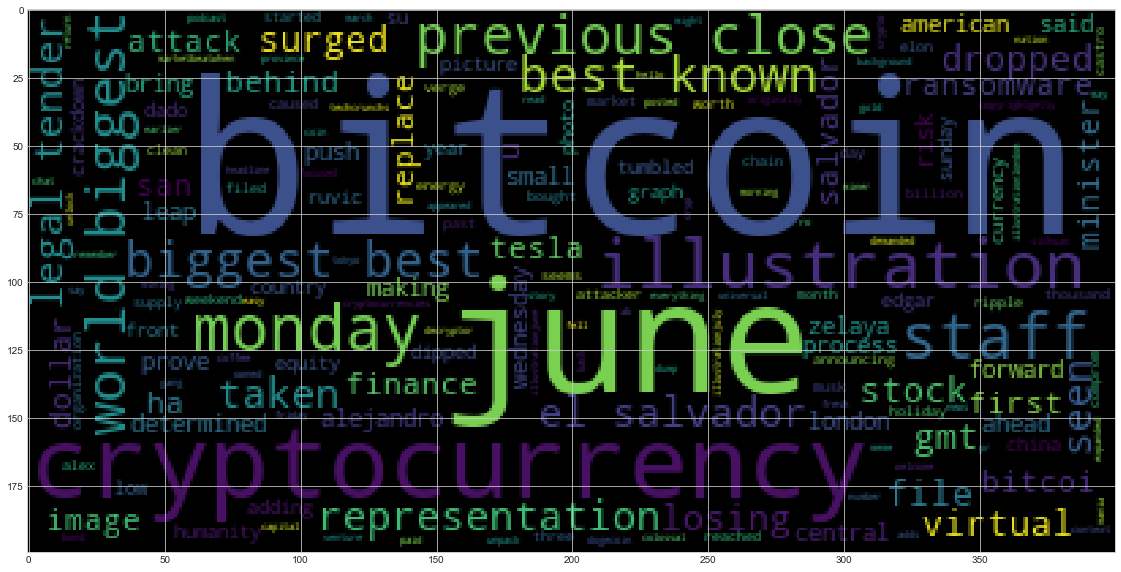

In [51]:
# Generate the Bitcoin word cloud
big_string = ''
for i in range(len(btc_df)):
    text = btc_df['tokens'][i]
    string = ' '.join(text)
    big_string += ' ' + string

btc_wc = WordCloud().generate(big_string)
plt.imshow(btc_wc)

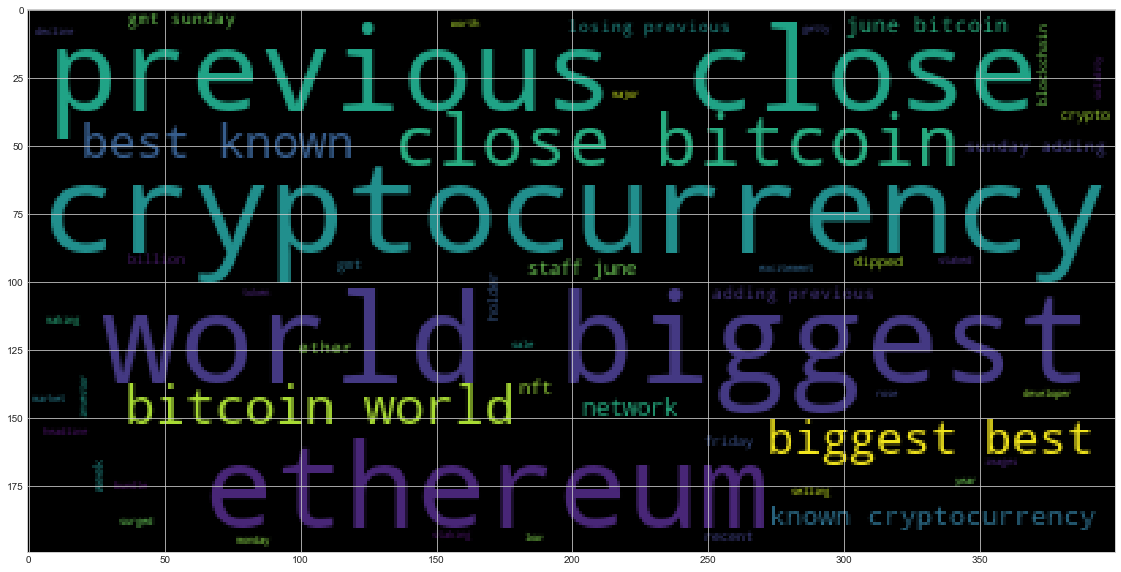

In [52]:
# Generate the Ethereum word cloud
big_string = ''
for i in range(len(eth_df)):
    text = eth_df['tokens'][i]
    string = ' '.join(text)
    big_string += ' ' + string

eth_wc = WordCloud().generate(big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [79]:
import spacy
from spacy import displacy

In [80]:
# Download the language model for SpaCy if required:
# !python -m spacy download en_core_web_sm

In [81]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [82]:
# Concatenate all of the Bitcoin text together
btc_text = btc_df.content.str.cat(sep=' ')


In [83]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [84]:
# Render the visualization
displacy.render(doc, style='ent')

In [78]:
# List all Entities
print([ent.text for ent in doc.ents])

['Elon Musk', 'Tesla', 'the past few months', 'first', 'Tesla', '$1.5 billion', 'Alex Castro', 'Verge', 'Three days', 'the holiday weekend', '$70m', '£50.5m', 'Bitcoin', 'June 16', 'Reuters', 'El Salvador', 'U.S.', 'Finance', 'Alejandro Zelaya', 'Wednesday', 'Central American', 'LONDON', 'June 23', 'Reuters', 'El Salvador', 'LONDON', 'June 23', 'Reuters', 'El Salvador', 'Pr', 'Reuters', 'Reuters', 'El Salvador', 'U.S.', 'Finance', 'Alejandro Zelaya', 'Wednesday', 'the Central American', 'Monday', 'morning', 'earlier this year', 'Dogecoin', 'Reuters', 'June 13', 'Reuters', '9.8%', '39,035.47', 'Sunday', '3,492.71', 'Bitcoin', 'June 21', 'Reuters', 'Monday', 'China', 'Sichuan', 'Bitcoin', 'as low as $32,288', 'first', 'Bitcoin', 'March 15, 2021', 'Dado Ruvic', 'June 30', 'Reuters', 'Bitcoin', 'June 14, 2021', 'Edgar Su', 'Reuters', '7.37%', '32,094.44', 'Bitcoin', 'Monday', 'China', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'GMT', 'Monday', '3,049.42', 'Bitcoin', '49.9%', 'Reut

---

### Ethereum NER

In [87]:
# Concatenate all of the Ethereum text together
eth_text = eth_df.content.str.cat(sep=' ')

In [88]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [89]:
# Render the visualization
displacy.render(doc, style='ent')

In [90]:
# List all Entities
print([ent.text for ent in doc.ents])

['21.25', 'June 17', '97%', 'NFT', 'hundreds of thousands', 'Yuriko Nakao', 'Friday', 'more than $13 billion', '2.0', 'Photothek/Getty Images', 'more than $13 billion', '2.0', '$40 billion', '2025', 'JPMorgan', 'Tim Berners-Lee', 'NFT', "Sotheby's", 'NFT', 'Two', 'Keep Network', 'Last week', 'NFT', 'as much as', '90 percent', 'recent weeks', 'recent months', 'Getty Images\r\nInvestors', 'the third week', 'February 2018', 'Reuters', 'June 13', 'Reuters', '9.83 %', '22:05', 'GMT', 'Sunday', '3,492.71', 'Bitcoin', '5.11 %', '37,360.63', 'GMT', 'Sunday', '1,817.87', 'Bitcoin', '34.7%', 'year', '27,7', 'Reuters', 'June 13', 'Reuters', '5.11 %', '37,360.63', 'GMT', 'Sunday', '1,817.87', 'Bitcoin', 'Reuters', 'June 25', 'Reuters', '7.37%', '32,094.44', 'Friday', '2,554.88', 'Bitcoin', '50.5', '9.83 %', '22:05', 'GMT', 'Sunday', '3,492.71', 'Bitcoin', '40.7%', 'year', '27', 'Reuters', 'June 25', 'Reuters', '8.51%', '31,699.83', '22:04', 'GMT', 'Friday', '2,937.27', 'Bitcoin', 'June 21', 'Reute

---